# Wstęp do multimediów - Laboratorium 1

```
Bartłomiej Krawczyk
310774

Grupa 103
```

# Funkcje pomocnicze

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List
from numpy import typing as npt

In [3]:
def calculate_spectrum(signal: List[float]) -> npt.NDArray[np.cdouble]:
    return np.fft.fft(signal) / len(signal) # type: ignore

In [4]:
def calculate_amplitude_spectrum(signal: List[float]) -> npt.NDArray[np.float64]:
    spectrum = calculate_spectrum(signal)
    return np.abs(spectrum)


In [5]:
def calculate_phase_spectrum(signal: List[float])  -> npt.NDArray[np.float64]:
    spectrum = calculate_spectrum(signal)
    return np.angle(spectrum) # type: ignore


In [6]:
def calculate_power(signal: List[float]) -> float:
    return sum([ x ** 2 for x in signal]) / len(signal)


In [7]:
def calculate_power_perseval(signal: List[float]) -> float:
    spectrum = calculate_spectrum(signal)
    return sum([np.abs(x) ** 2 for x in spectrum])


# Zadanie 1
Dane są dwa sygnały o okresie podstawowym `N = 4`:
- `s1 = {2,0,1,3}`
- `s2 = {1,0,3,0}`

In [8]:
period = 4
signal_1 = [2.0, 0.0, 1.0, 3.0]
signal_2 = [1.0, 0.0, 3.0, 0.0]

a) Dla każdego sygnału:
- wyznaczyć i wykreślić widmo amplitudowe i fazowe, 
- obliczyć moc sygnału 
- sprawdzić słuszność twierdzenia Parsevala.

In [9]:
def signal_description_1(signal: List[float]) -> None:
    
    amplitude_spectrum = calculate_amplitude_spectrum(signal)
    print(f'{amplitude_spectrum = }')
    plt.stem(amplitude_spectrum) # type: ignore
    plt.title("Amplitude Spectrum")
    plt.show()
    
    phase_spectrum = calculate_phase_spectrum(signal)
    print(f'{phase_spectrum = }')
    plt.stem(phase_spectrum) # type: ignore
    plt.title("Phase Spectrum")
    plt.show()

    power = calculate_power(signal)
    print(f'{power = }')
    perseval_power = calculate_power_perseval(signal)
    print(f'{perseval_power = }')

    print(f'{(power == perseval_power) = }')
    


### Dane wyznaczone dla 1 sygnału

amplitude_spectrum = array([1.5       , 0.79056942, 0.        , 0.79056942])


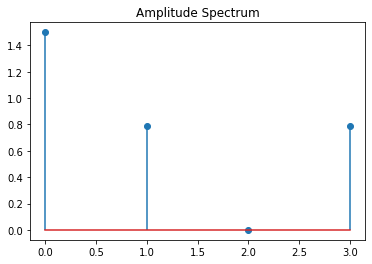

phase_spectrum = array([ 0.        ,  1.24904577,  0.        , -1.24904577])


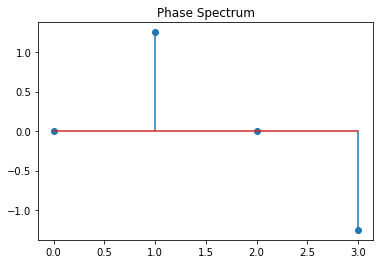

power = 3.5
perseval_power = 3.5
(power == perseval_power) = True


In [10]:
signal_description_1(signal_1)

### Dane wyznaczone dla 2 sygnału

amplitude_spectrum = array([1. , 0.5, 1. , 0.5])


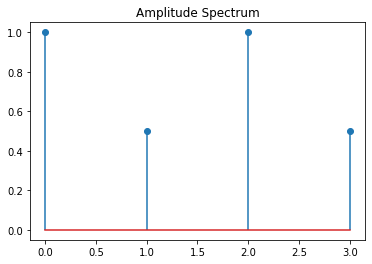

phase_spectrum = array([0.        , 3.14159265, 0.        , 3.14159265])


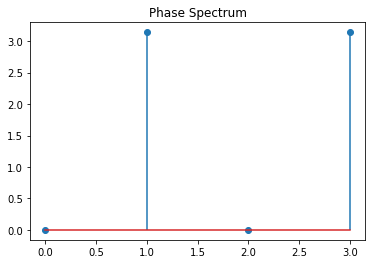

power = 2.5
perseval_power = 2.5
(power == perseval_power) = True


In [11]:
signal_description_1(signal_2)

b) Sprawdzić słuszność twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnałów `s1` i `s2`: 
- wyznaczyć ręcznie splot kołowy sygnałów `s1` i `s2`, 
- a następnie wyznaczyć ten splot ponownie za pomocą dyskretnej transformacji Fouriera.

In [12]:
def calculate_circular_convolution(signal_1: List[float], signal_2: List[float]) -> List[float]:
    assert(len(signal_1) == len(signal_2))

    convolution = [0.0] * len(signal_1)

    for n in range(len(convolution)):
        for m in range(len(convolution)):
            convolution[n] += signal_1[m] * signal_2[n - m]
            
    return convolution

In [13]:
def calculate_circular_convolution_fft(signal_1: List[float], signal_2: List[float]) -> npt.NDArray[np.cdouble]:
    return np.fft.ifft(np.fft.fft(signal_1) * np.fft.fft(signal_2)) # type: ignore

In [14]:
convolution = calculate_circular_convolution(signal_1, signal_2)
convolution_fft = calculate_circular_convolution_fft(signal_1, signal_2)
print(f'{convolution=}')
print(f'{convolution_fft=}')

print(f'{(convolution == convolution_fft) = }') # type: ignore

convolution=[5.0, 9.0, 7.0, 3.0]
convolution_fft=array([5.+0.j, 9.+0.j, 7.+0.j, 3.+0.j])
(convolution == convolution_fft) = array([ True,  True,  True,  True])


# Zadanie 2
Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego sygnału harmonicznego:

`s(n) = A sin (2 pi n / N)`
- o amplitudzie A = 4 
- i okresie podstawowym N = 52.

W tym celu dla każdej wartości:
- `no = {0, N/4, N/2, 3N/4}`

wykreślić widmo amplitudowe i fazowe przesuniętego sygnału s(n - no). 

Skomentować otrzymane wyniki.

In [15]:
A = 4
N = 52
signal = [A * np.sin(2 * np.pi * n / N) for n in range(N)]

In [16]:
def signal_description_2(signal: List[float]) -> None:
    spectrum = calculate_spectrum(signal)

    amplitude_spectrum = calculate_amplitude_spectrum(signal)
    phase_spectrum = calculate_phase_spectrum(signal)

    for i in range(len(spectrum)):
        if amplitude_spectrum[i] < 1e-6:
            amplitude_spectrum[i] = 0
            phase_spectrum[i] = 0

    plt.stem(amplitude_spectrum) # type: ignore
    plt.title('Amplitude Spectrum')
    plt.show()

    plt.stem(phase_spectrum) # type: ignore
    plt.title('Phase Spectrum')
    plt.show()


In [17]:
def shift_signal(signal: List[float], index: int) -> List[float]:
    return signal[index:] + signal[:index]

### Widmo amplitudowe i fazowe sygnału s przesuniętego o 0

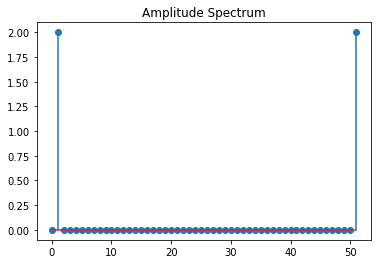

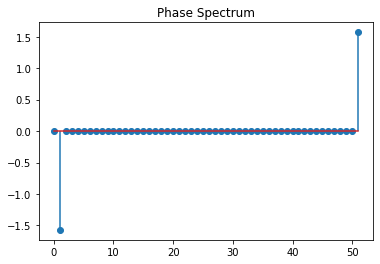

In [18]:
signal_description_2(shift_signal(signal, 0))

### Widmo amplitudowe i fazowe sygnału s przesuniętego o N/4

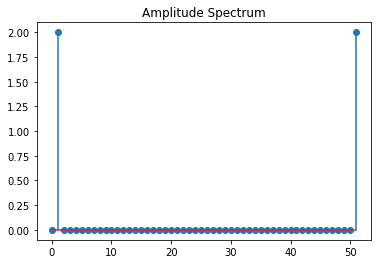

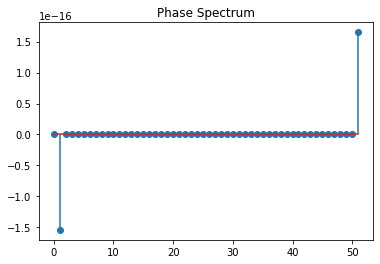

In [19]:
signal_description_2(shift_signal(signal, N // 4))

### Widmo amplitudowe i fazowe sygnału s przesuniętego o N/2

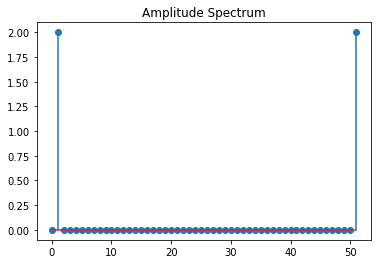

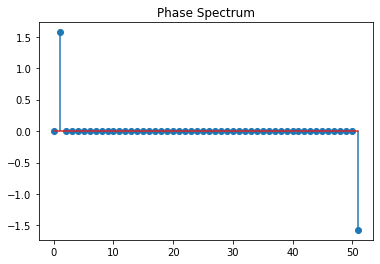

In [20]:
signal_description_2(shift_signal(signal, N // 2))

### Widmo amplitudowe i fazowe sygnału s przesuniętego o 3N/4

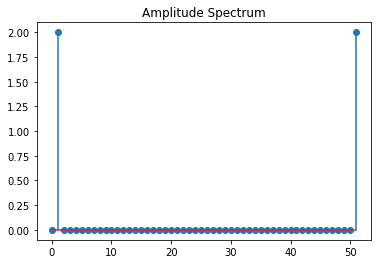

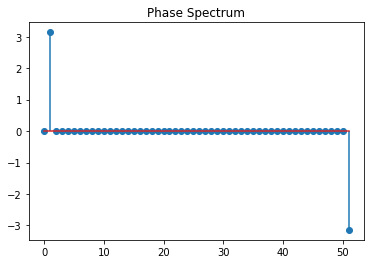

In [21]:
signal_description_2(shift_signal(signal, 3 * N // 4))


## Wnioski
TODO: napisz wnioski xD

# Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału:

`s(n) = A (n mod N) / N`
- o amplitudzie A = 3 
- i okresie podstawowym N = 11.

W tym celu dla każdej wartości 

`No = { 0, 1N, 4N, 9N }` 

wykreślić widmo amplitudowe i fazowe sygnału `s(n)`dopełnionego `No` zerami. 

Skomentować otrzymane wyniki.

In [22]:
A = 3 # type: ignore
N = 11  # type: ignore
signal = [A * (n % N) / N for n in range(N)]

In [23]:
def signal_description_3(signal: List[float]) -> None:

    amplitude_spectrum = calculate_amplitude_spectrum(signal)
    plt.stem(amplitude_spectrum)  # type: ignore
    plt.title('Amplitude Spectrum')
    plt.show()

    phase_spectrum = calculate_phase_spectrum(signal)
    plt.stem(phase_spectrum)  # type: ignore
    plt.title('Phase Spectrum')
    plt.show()

In [24]:
def add_zeros(signal: List[float], zeros: int) -> List[float]:
    return signal + [0.0] * zeros

### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego 0 zerami

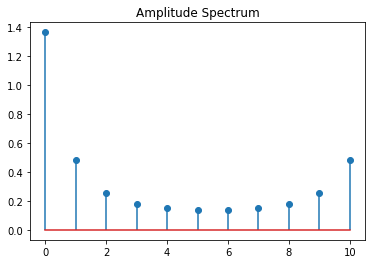

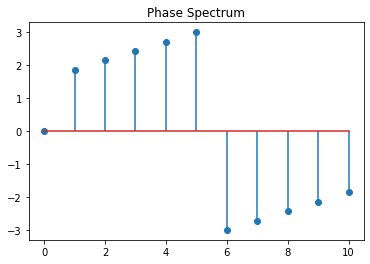

In [25]:
signal_description_3(add_zeros(signal, 0))

### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego N zerami

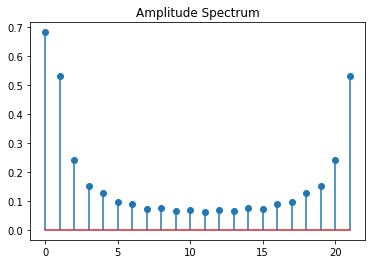

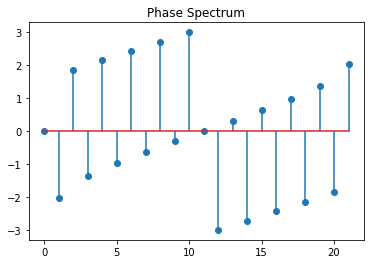

In [26]:
signal_description_3(add_zeros(signal, N))

### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego 4N zerami

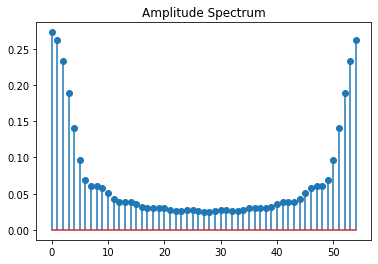

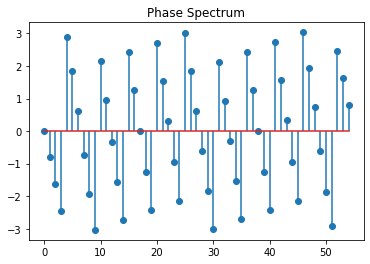

In [27]:
signal_description_3(add_zeros(signal, 4 * N))


### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego 9N zerami

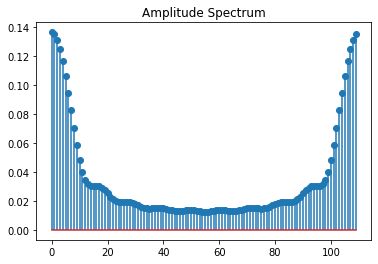

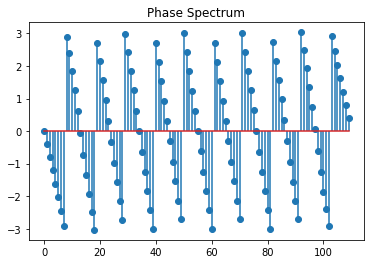

In [28]:
signal_description_3(add_zeros(signal, 9 * N))

# Zadanie 4
Dany jest sygnał rzeczywisty 

`s(t) = A1 sin(2 pi f1 t) + A2 sin(2 pi f2 t) + A3 sin(2 pi f3 t)`,

gdzie 
- `A1 = 0.3`, `f1 = 5000 Hz`, 
- `A2 = 0.4`, `f2 = 6000 Hz`, 
- `A3 = 0.5`, `f3 = 11000 Hz`. 

Przy założeniu, że częstotliwość próbkowania wynosi `fs = 48000 Hz`, a liczba próbek sygnału wynosi `N1 = 2048` , przedstawić wykres
widmowej gęstości mocy sygnału `s(t)`.

Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? 

Czy sytuacja uległaby zmianie dla liczby próbek `N2 = 3 * N1 / 2`?

Odpowiedź uzasadnić.

In [29]:
A1 = 0.3
f1 = 5000

A2 = 0.4
f2 = 6000

A3 = 0.5
f3 = 11000

fs = 48000

N1 = 2048
N2 = 3 * N1 // 2

In [30]:
def signal_val(t: float):
    return  A1 * np.sin(2 * np.pi * f1 * t) + \
            A2 * np.sin(2 * np.pi * f2 * t) + \
            A3 * np.sin(2 * np.pi * f3 * t)


In [31]:
def calculate_spectrum_power_density(signal: List[float]) -> List[float]:
    return [np.abs(val / len(signal)) for val in np.fft.rfft(signal)] # type: ignore


In [47]:
def signal_description_4(signal: List[float]) -> None:
    power = calculate_spectrum_power_density(signal)
    delta_f = fs / len(signal)
    plt.stem([i * delta_f for i in range(len(power))], power) # type: ignore
    plt.show()


### Wykres widmowej gęstości mocy spróbkowanego sygnału s(t) przy liczbie próbek równej N1 = 2048

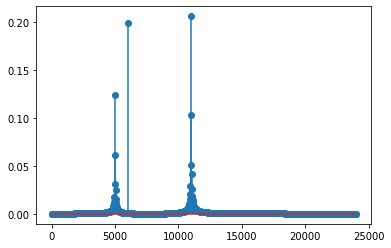

In [48]:
signal_description_4([signal_val(n / fs) for n in range(N1)])

### Wykres widmowej gęstości mocy spróbkowanego sygnału s(t) przy liczbie próbek równej N2 = 3072

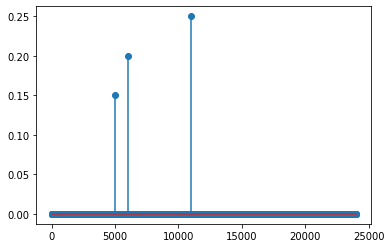

In [49]:
signal_description_4([signal_val(n / fs) for n in range(N2)])

In [38]:
period = np.gcd.reduce([f1, f2, f3]) # type: ignore
window = fs / period
print(f'{window = }')
print(f'{(N1 % window == 0) = }')
print(f'{(N2 % window == 0) = }')

window = 48.0
(N1 % window == 0) = False
(N2 % window == 0) = True


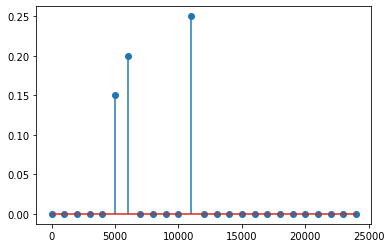

In [46]:
signal_description_4([signal_val(n / fs) for n in range(int(window))])